In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

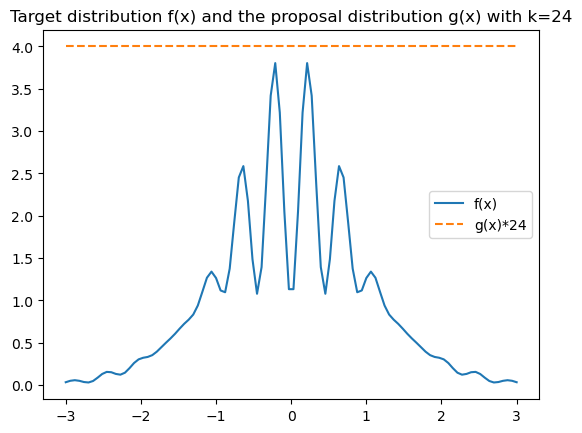

In [61]:
# first plot the function from which we sample
# deined for x in [-3, 3]
def f(x):
    return np.exp(-x**2 /2)*(np.sin(x)**2 + 3 * np.cos(x)**2 *np.sin(7*x)**2+1)

x = np.linspace(-3, 3, 100)
y = f(x)

# density of the proposal distribution
def g(x):
    return 1/6 + x*0
k=24
plt.plot(x, y, label='f(x)')
plt.plot(x, g(x)*k, '--', label=f'g(x)*{k}')
plt.title(f'Target distribution f(x) and the proposal distribution g(x) with k={k}')
plt.legend()
plt.show()

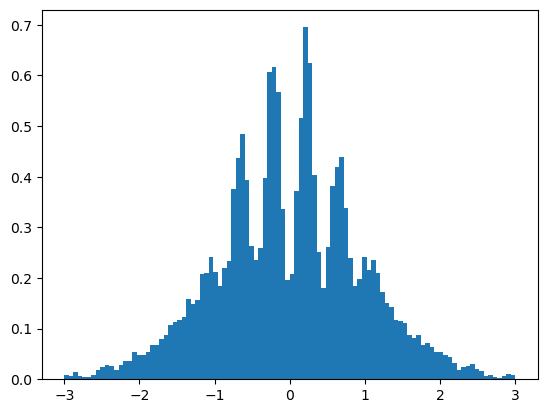

In [62]:
# we sample from our proposal distribution
q = np.random.uniform(-3, 3, 100000)

# and samples from the uniform distribution
u = np.random.uniform(0, 1, 100000)

# reject or accept samples
accept = q[u <= f(q)/(k*g(q))]

# plot the accepted samples
plt.hist(accept, bins=100, density=True)
plt.show()


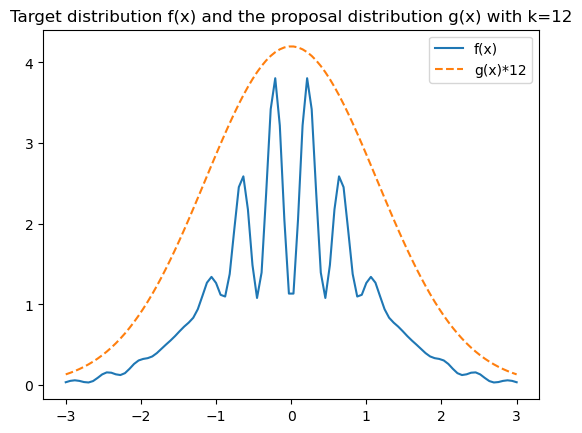

In [63]:
## we try rejection sampling with a uniform proposal distribution
# we need to find the maximum of the function
k = 12

# density of the proposal distribution
sigma_sqrd = 1.3
mu = 0
def g(x):
    return (1/(np.sqrt(2*np.pi*sigma_sqrd)))*np.exp(-(x-mu)**2/(2*sigma_sqrd))

# first we plot the proposal distribution on top of the distribution we want to sample from
x = np.linspace(-3, 3, 100)
y = f(x)
y_g = g(x) *k

plt.plot(x, y, label='f(x)')
plt.plot(x, y_g, '--', label=f'g(x)*{k}')
plt.title(f'Target distribution f(x) and the proposal distribution g(x) with k={k}')
plt.legend()
plt.show()


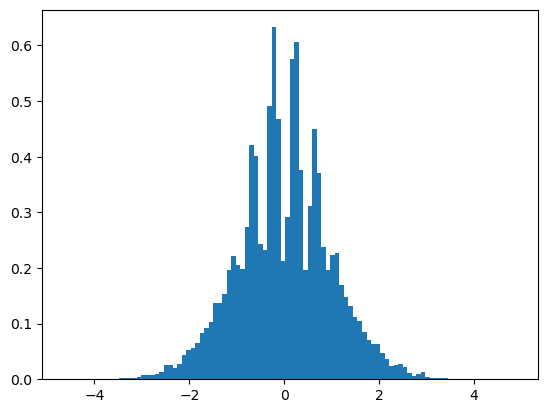

In [64]:
# now we sample from the proposal distribution
q = np.random.normal(mu, np.sqrt(sigma_sqrd), 100000)

# and samples from the uniform distribution
u = np.random.uniform(0, 1, 100000)

accept = q[u <= f(q)/(k*g(q))]

# plot the accepted samples
plt.hist(accept, bins=100, density=True)
plt.show()


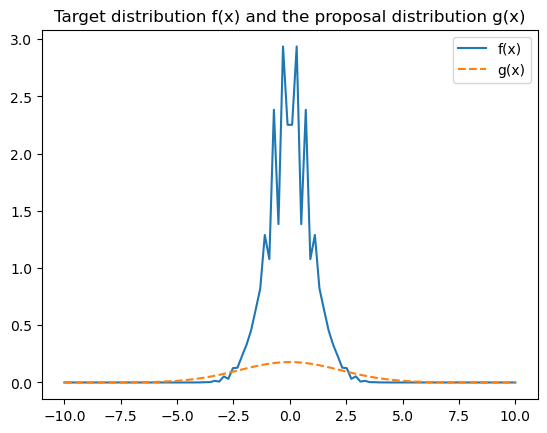

In [65]:
# do the same but with importance sampling
# gaussian proposal distribution
sigma_sqrd = 5
mu = 0
def g(x):
    return (1/(np.sqrt(2*np.pi*sigma_sqrd)))*np.exp(-(x-mu)**2/(2*sigma_sqrd))

# plot the proposal distribution
x = np.linspace(-10, 10, 100)
y = g(x)
plt.plot(x, f(x), label='f(x)')
plt.plot(x, y, '--', label='g(x)')
plt.title(f'Target distribution f(x) and the proposal distribution g(x)')
plt.legend()
plt.show()

In [66]:
# draw L samples from the proposal distribution
L = 100 
z = np.random.normal(mu, np.sqrt(sigma_sqrd), L)

# estimate the ratio of normalization constants
zpzq = 1/L * np.sum(f(z)/g(z))

# next we estimate h(x) where h(x) = x**2
def h(x):
    return x**2

estimate = (1/zpzq) * np.sum(f(z)/g(z) * h(z)) *1/L
print(estimate)


0.8756492373540636


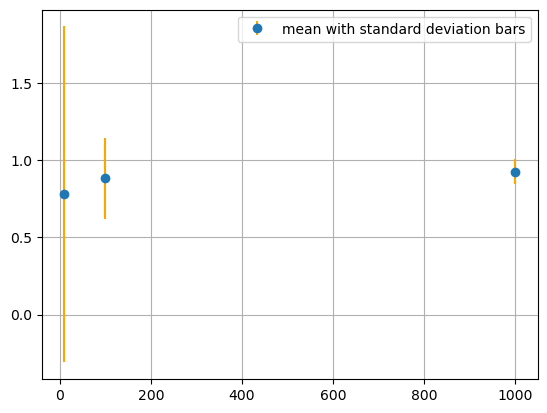

In [67]:
# calculate mean and variance of the estimator of E[x**2] using the previous sampling techniques

# rejection sampling with uniform proposal distribution
L_list = [10, 100, 1000]
mean_list = []
var_list = []
for L in L_list:
    n = 100
    estimate_list = []
    for _ in range(n):
        k = 24
        # density of the proposal distribution
        def g(x):
            return 1/6 + x*0
        # we sample from our proposal distribution
        q = np.random.uniform(-3, 3, L)
        # and samples from the uniform distribution
        u = np.random.uniform(0, 1, L)
        # reject or accept samples
        accept = q[u <= f(q)/(k*g(q))]
        if accept.size == 0: 
            accept = np.array([0])
        estimate = np.mean(accept**2)
        estimate_list.append(estimate)
    # calculate mean and variance of the estimator of E[x**2]
    mean_list.append(np.mean(estimate_list))
    var_list.append(np.var(estimate_list))
# plot the mean and variance of the estimator of E[x**2]
plt.errorbar(L_list, mean_list, yerr=np.sqrt(var_list), label='mean with standard deviation bars', fmt='o', ecolor='orange')
plt.legend()
plt.grid()
plt.show()

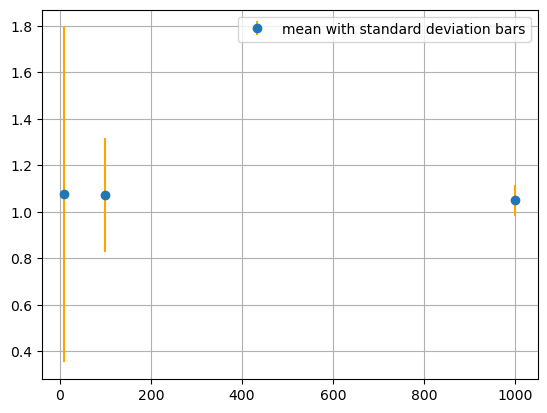

In [68]:
# calculate mean and variance of the estimator of E[x**2] using rejection sampling with gaussian proposal distribution
L_list = [10, 100, 1000]
mean_list = []
var_list = []
for L in L_list:
    n = 100
    estimate_list = []
    for _ in range(n):
        k = 12
        # density of the proposal distribution
        def g(x):
            return (1/(np.sqrt(2*np.pi*sigma_sqrd)))*np.exp(-(x-mu)**2/(2*sigma_sqrd))
        # we sample from our proposal distribution
        q = np.random.normal(mu, np.sqrt(sigma_sqrd), L)
        # and samples from the uniform distribution
        u = np.random.uniform(0, 1, L)
        # reject or accept samples
        accept = q[u <= f(q)/(k*g(q))]
        if accept.size == 0: 
            accept = np.array([0])  
        estimate = np.mean(accept**2)
        estimate_list.append(estimate)
    # calculate mean and variance of the estimator of E[x**2]
    mean_list.append(np.mean(estimate_list))
    var_list.append(np.var(estimate_list))
# plot the mean and variance of the estimator of E[x**2]
plt.errorbar(L_list, mean_list, yerr=np.sqrt(var_list), label='mean with standard deviation bars', fmt='o', ecolor='orange')
plt.legend()
plt.grid()
plt.show()

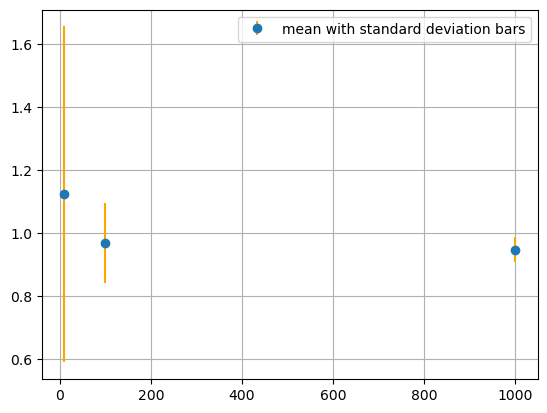

In [69]:
# calculate mean and variance of the estimator of E[x**2] using importance sampling
L_list = [10, 100, 1000]
mean_list = []
var_list = []
for L in L_list:
    n = 100
    estimate_list = []
    for _ in range(n):
        sigma_sqrd = 5
        mu = 0
        def g(x):
            return (1/(np.sqrt(2*np.pi*sigma_sqrd)))*np.exp(-(x-mu)**2/(2*sigma_sqrd))
        z = np.random.normal(mu, np.sqrt(sigma_sqrd), L)
        zpzq = 1/L * np.sum(f(z)/g(z))
        # next we estimate h(x) where h(x) = x**2
        def h(x):
            return x**2
        estimate = (1/zpzq) * np.sum(f(z)/g(z) * h(z)) *1/L
        estimate_list.append(estimate)
    mean_list.append(np.mean(estimate_list))
    var_list.append(np.var(estimate_list))
# plot the mean and variance of the estimator of E[x**2]
plt.errorbar(L_list, mean_list, yerr=np.sqrt(var_list), label='mean with standard deviation bars', fmt='o', ecolor='orange')
#plt.scatter(L_list, var_list, label='variance')
plt.legend()
plt.grid()
plt.show()
